# MultiClassification

## 1. Load Data and Train Model

In [1]:
import sys

sys.path.insert(0, "/home/cristian/holisticai/src")

In [2]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression(solver='liblinear')
model.fit(train['X'], train['y'])

y_pred = model.predict(train['X'])
accuracy_score(test['y'], model.predict(test['X']))

0.8227848101265823

In [3]:
from holisticai.utils import MultiClassificationSurrogate

surrogate = MultiClassificationSurrogate(train["X"], y_pred, model_type='tree')

y_surrogate = surrogate.predict(train['X'])

In [4]:
from holisticai.explainability.metrics import surrogate_accuracy_difference
# The accuracy difference between the original model and the surrogate model

surrogate_accuracy_difference(train['y'], y_pred, y_surrogate)

0.025316455696202556

In [5]:
from holisticai.explainability.metrics import surrogate_accuracy_score
# The accuracy of the surrogate model

surrogate_accuracy_score(y_pred, y_surrogate)

0.9240506329113924

In [6]:
from holisticai.explainability.metrics import surrogate_features_stability
# Measure the stability of the features. Higher values indicate that the features are stable

surrogate_features_stability(train['X'], y_pred, surrogate)

0.46930651048298105

In [7]:
from holisticai.explainability.metrics import surrogate_feature_importances_stability
# Measure the stability of the feature importances. Higher values indicate that the feature importances are stable

surrogate_feature_importances_stability(train['X'], y_pred, surrogate)

0.6731926981481441

In [8]:
from holisticai.explainability.metrics import spread_divergence
# Measure the spread of the feature importances. Lower values indicate that the feature importances are concentrated and more interpretable

spread_divergence(surrogate.feature_importances_)

0.45249970247234705

# Tree-Based Metrics

In [9]:
from holisticai.explainability.metrics.tree import tree_number_of_features
# Measure the number of features used in the surrogate model. Lower values indicate that the surrogate model is more interpretable

tree_number_of_features(surrogate)

17

In [10]:
from holisticai.explainability.metrics.tree import tree_number_of_rules
# Measure the number of rules used in the surrogate model. Lower values indicate that the surrogate model is more interpretable

tree_number_of_rules(surrogate)

24

In [11]:
from holisticai.explainability.metrics.tree import tree_depth_variance
# Measure the variance of the depth of the surrogate model. Lower values indicate that the surrogate model is more interpretable

tree_depth_variance(surrogate)

np.float64(5.526041666666667)

In [12]:
from holisticai.explainability.metrics.tree import weighted_average_depth
# Measure the weighted average depth of the surrogate model. Lower values indicate that the surrogate model is more interpretable

weighted_average_depth(surrogate)

np.float64(5.56)

In [13]:
from holisticai.explainability.metrics.tree import weighted_average_explainability_score
# Measure the weighted average explainability score of the surrogate model. Lower values indicate that the surrogate model is more interpretable

weighted_average_explainability_score(surrogate)

np.float64(5.56)

In [14]:
from holisticai.explainability.metrics.tree import weighted_tree_gini
# Measure the weighted tree gini of the surrogate model. Lower values indicate that the surrogate model is more interpretable

weighted_tree_gini(surrogate)

np.float64(0.6570000000000001)

In [17]:
from holisticai.explainability.metrics import classification_surrogate_explainability_metrics
# Compute all the surrogate explainability metrics

metrics, surrogate = classification_surrogate_explainability_metrics(train['X'], train['y'], y_pred, surrogate_type='tree', metric_type="all", return_surrogate_model=True)
metrics

,Value,Reference
Surrogate Accuracy Difference,0.025316,0.0
Surrogate Accuracy,0.924051,1.0
Features Stability,0.469307,1.0
Feature Importances Stability,0.673193,1.0
Spread Divergence,0.452500,0.0
Number of Features,17.000000,1.0
Number of Rules,24.000000,1.0
Tree Depth Variance,5.526042,0.0
Weighted Average Explainability Score,5.560000,0.0
Weighted Average Depth,5.560000,0.0


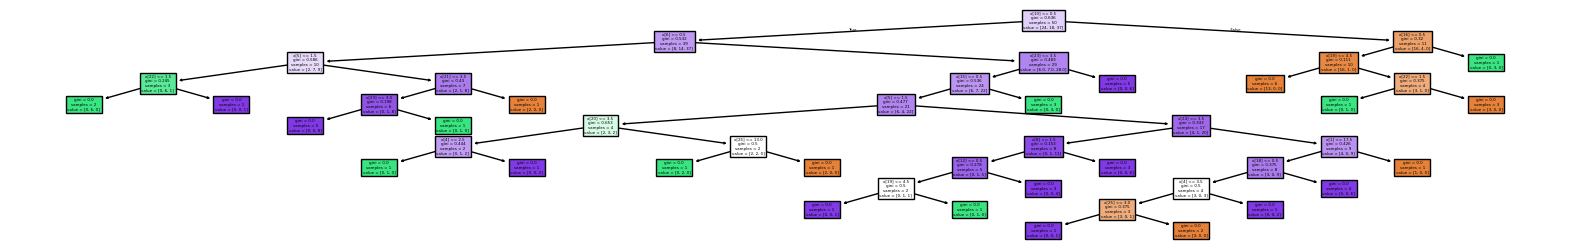

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plot the surrogate model
plt.figure(figsize=(20,3))
_ = plot_tree(surrogate._surrogate, filled=True)